In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

csv_file_path = "input.csv"
df = pd.read_csv(csv_file_path)

print(df)

                        title                              movie_url  rating  \
0    The Shawshank Redemption  https://www.imdb.com/title/tt0111161/     9.3   
1               The Godfather  https://www.imdb.com/title/tt0068646/     9.2   
2             The Dark Knight  https://www.imdb.com/title/tt0468569/     9.0   
3       The Godfather Part II  https://www.imdb.com/title/tt0071562/     9.0   
4                12 Angry Men  https://www.imdb.com/title/tt0050083/     9.0   
..                        ...                                    ...     ...   
245            Koe no katachi  https://www.imdb.com/title/tt5323662/     8.1   
246                  The Help  https://www.imdb.com/title/tt1454029/     8.1   
247             Amores perros  https://www.imdb.com/title/tt0245712/     8.0   
248                   Rebecca  https://www.imdb.com/title/tt0032976/     8.1   
249                  Drishyam  https://www.imdb.com/title/tt4430212/     8.2   

                       genre  release_y

# Transform Data
    Remove null Values
    Year float -> int
    Box Office currency string -> float

In [2]:
# First check for missing values
print(df.isnull().sum())

# Box office coloumn has 4 missing values and release year has 1 
# Clean the data set by dropping those
clean_df = df.dropna()

# Convert 'release_year' column to int
clean_df['release_year'] = clean_df['release_year'].astype(int)

# Remove dollar signs and commas from 'box_office' column and convert to float
clean_df['box_office'] = clean_df['box_office'].replace('[\$,]', '', regex=True).astype(float)

print(clean_df)


title           0
movie_url       0
rating          0
genre           0
release_year    1
directors       0
lead_actors     0
box_office      4
dtype: int64
                        title                              movie_url  rating  \
0    The Shawshank Redemption  https://www.imdb.com/title/tt0111161/     9.3   
1               The Godfather  https://www.imdb.com/title/tt0068646/     9.2   
2             The Dark Knight  https://www.imdb.com/title/tt0468569/     9.0   
3       The Godfather Part II  https://www.imdb.com/title/tt0071562/     9.0   
4                12 Angry Men  https://www.imdb.com/title/tt0050083/     9.0   
..                        ...                                    ...     ...   
244             Groundhog Day  https://www.imdb.com/title/tt0107048/     8.0   
245            Koe no katachi  https://www.imdb.com/title/tt5323662/     8.1   
246                  The Help  https://www.imdb.com/title/tt1454029/     8.1   
247             Amores perros  https://www.

<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
/var/folders/ld/zllb3tcd7gn5jz6s0zgzk5lc0000gn/T/ipykernel_36862/2318911510.py:12: SyntaxWarning: invalid escape sequence '\$'
  clean_df['box_office'] = clean_df['box_office'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/ld/zllb3tcd7gn5jz6s0zgzk5lc0000gn/T/ipykernel_36862/2318911510.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['release_year'] = clean_df['release_year'].astype(int)
/var/folders/ld/zllb3tcd7gn5jz6s0zgzk5lc0000gn/T/ipykernel_36862/2318911510.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

# 2. Descriptive and Statistical Analysis

       rating  release_year    box_office
count  245.00        245.00        245.00
mean     8.31       1988.24  230644086.71
std      0.23         25.59  371534624.10
min      8.00       1921.00        399.00
25%      8.10       1972.00    7968347.00
50%      8.20       1995.00   64417003.00
75%      8.40       2009.00  321752656.00
max      9.30       2024.00 2799439100.00


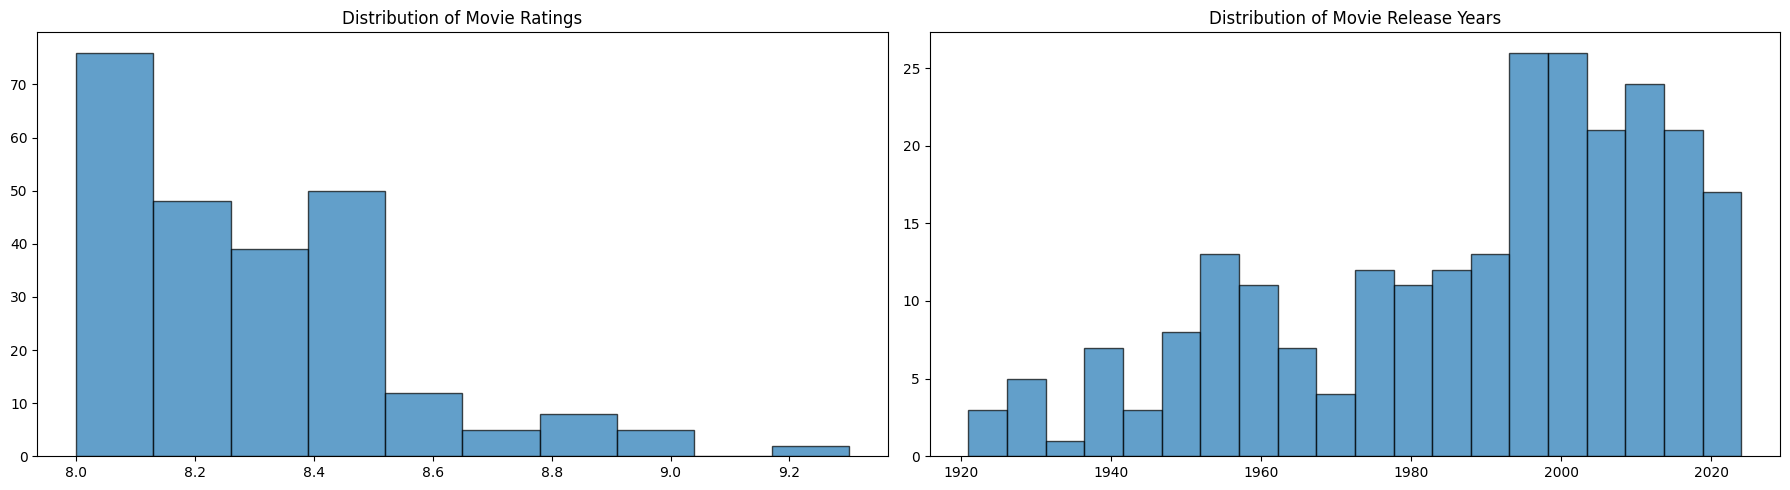

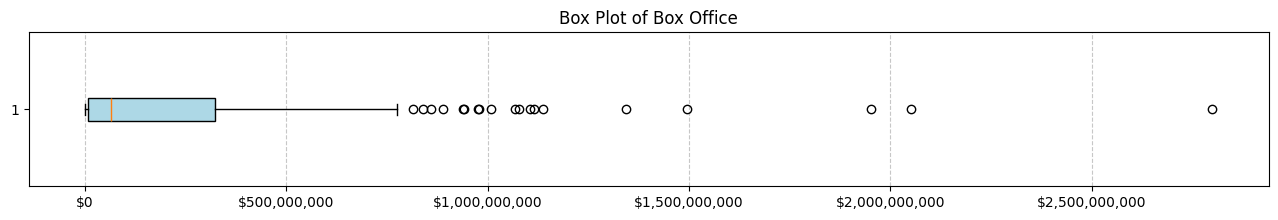

In [3]:
# Perform statistical analyssis on key numerical attributes
pd.options.display.float_format = '{:.2f}'.format
statistical_summary = clean_df[['rating', 'release_year', 'box_office']].describe()
print(statistical_summary)

# Create histograms for rating, release_year

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].hist(clean_df['rating'], bins=10, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Movie Ratings')

axes[1].hist(clean_df['release_year'], bins=20, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Movie Release Years')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 2))
plt.boxplot(clean_df['box_office'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title('Box Plot of Box Office')
plt.grid(axis='x', linestyle='--', alpha=0.7)

formatter = ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

1. Rating
    - Average rating 8.3 which tells us majority movies are well liked by the viewers.
    - Standard deviation is 0.233, which is low.
    - Indicates most movies are near the mean value.
    - Minimum rating is 8.0 which means, even the lowest rated movie is well reciveved.
    - Maximum rating is 9.3 which means highest rated movie has almost a perfect rating.
    - The middle 50% ratings is between 8.1 - 8.4.

2. Release Year
    - Min is 1921 and max is 2024, which means data set contain moviews throughout the century which is a large span.
    - Standard deviation is 25 which is quite high. Higher variablility of years.
    - Q1 is 1972 and Q3 is 2009 which indicates majority of movies were releaed between this time span since dataset skewed to more recent movies according to the plots.

3. Box Office
    - Mean is 230.64M which means movies earned that much on average.
    - Standard deviation is 371.53M which is really high, which indicates high variation.
    - Min and Max confirm that because min is 399.00 and max is 2.8 billon which indicates two extream end values.

# 3. Data Visualizations

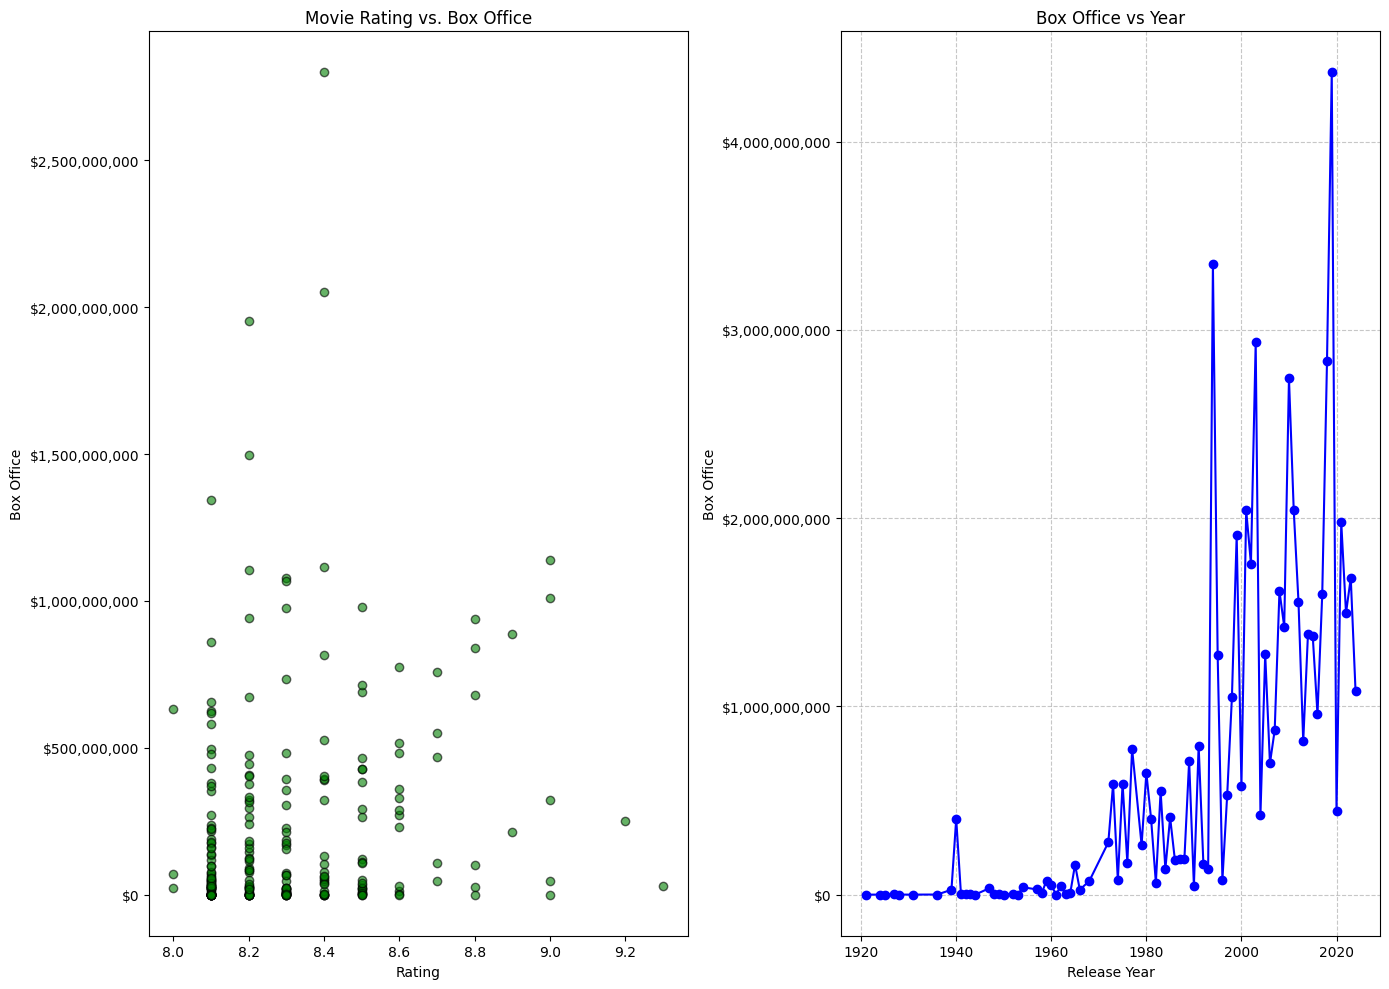

In [4]:
# Rating vs Box Office
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
formatter = ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')
axes[0].scatter(clean_df['rating'], clean_df['box_office'], alpha=0.6, color='green', edgecolors='black')
axes[0].set_title('Movie Rating vs. Box Office')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Box Office')
axes[0].yaxis.set_major_formatter(formatter)

# Box Office vs Release Year
df_sorted = clean_df.groupby('release_year')['box_office'].sum().reset_index()
axes[1].plot(df_sorted['release_year'], df_sorted['box_office'], marker='o', linestyle='-', color='blue')
axes[1].set_title('Box Office vs Year')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Box Office')
axes[1].yaxis.set_major_formatter(formatter)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Movie Rating vs Box office

 - Seems like movies rated between 8.1 - 8.4 have consistently given good box office records.
 - There's no indication that higest rated movies earned more than lower rated moviews.
 - Also there are few outliers.

### Box office vs Revenue
 - Box office earnings have been steadily increasing over time.
 - After 1990 there has been a significant increase of box office earnings.
 - During 1920 - 1960 earnings have been stagnating.
 - Sikes can may indicate blockbuster releases.

# 4.Movie and Director Trends

### 4.1 Investigate the most recurrent directors and actors over the years.

In [11]:

from collections import Counter
import ast

df = pd.DataFrame()
df['directors'] = clean_df['directors'].apply(ast.literal_eval)
director_counts = Counter([director for sublist in df['directors'] for director in sublist])
top_10_directors = pd.DataFrame(director_counts.most_common(10), columns=['Director', 'Movie Count'])
print(top_10_directors)

print("\n")

df['lead_actors'] = clean_df['lead_actors'].apply(ast.literal_eval)
actor_counts = Counter([actor for sublist in df['lead_actors'] for actor in sublist])
top_10_actors = pd.DataFrame(actor_counts.most_common(10), columns=['Actor', 'Movie Count'])
print(top_10_actors)

            Director  Movie Count
0  Christopher Nolan            8
1   Steven Spielberg            7
2    Martin Scorsese            7
3    Stanley Kubrick            7
4     Akira Kurosawa            6
5   Alfred Hitchcock            6
6  Quentin Tarantino            5
7    Charles Chaplin            5
8       Billy Wilder            5
9       Sergio Leone            4


               Actor  Movie Count
0     Robert De Niro            9
1          Tom Hanks            6
2  Leonardo DiCaprio            6
3      Harrison Ford            6
4     Christian Bale            5
5     Clint Eastwood            5
6         Matt Damon            5
7    Charles Chaplin            5
8     Morgan Freeman            4
9          Al Pacino            4


### 4.2 Identify trends in the number of movies directed by prominent directors, and how often they appear in the top-grossing movies.

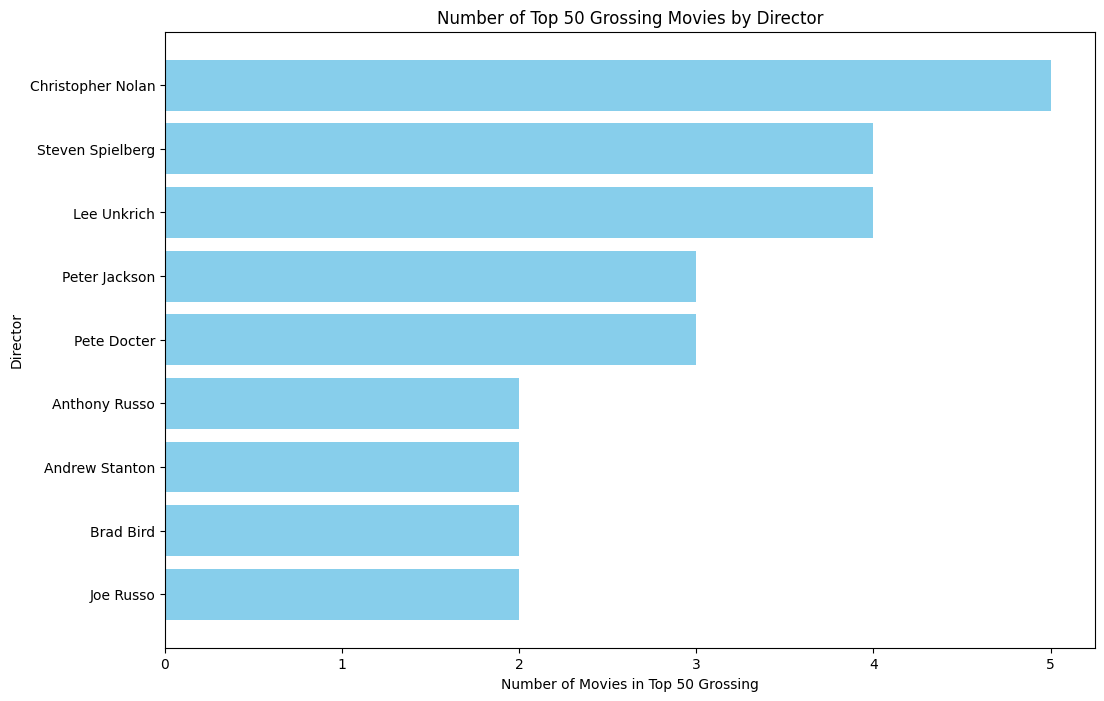

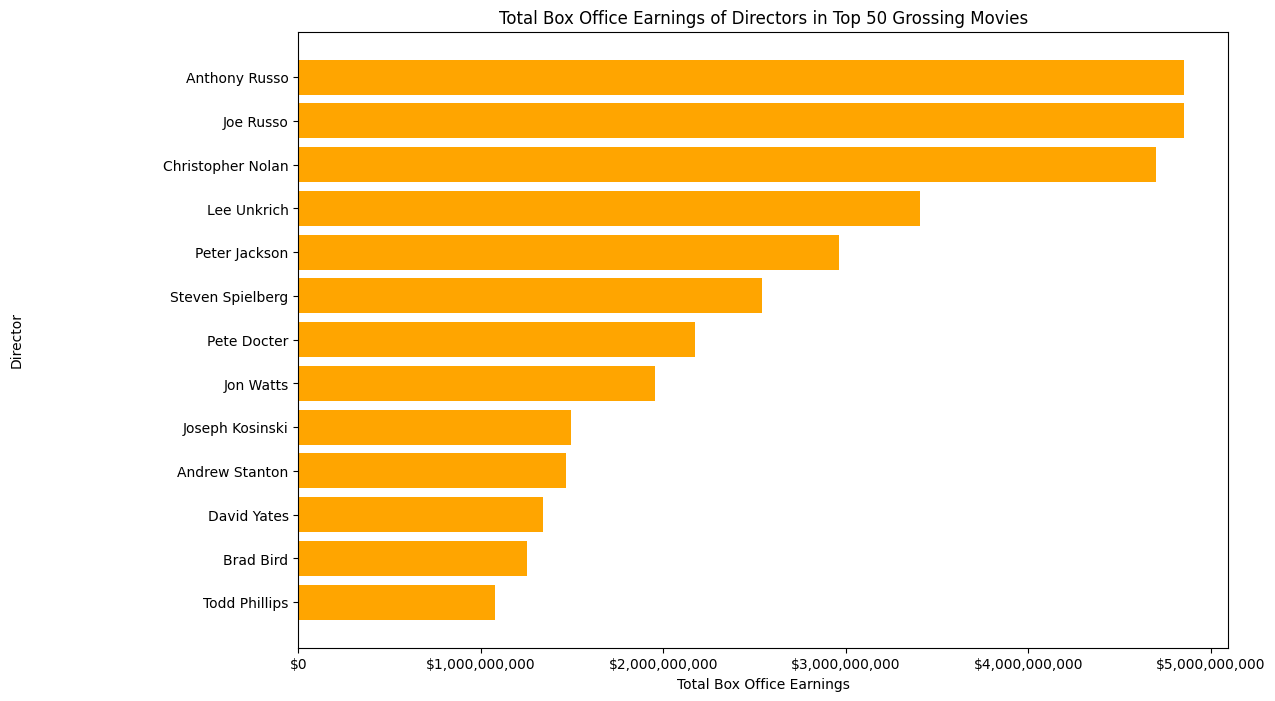

In [35]:
# Take the top 50 grossing movies , and analyse the directors

top_50_grossing = clean_df.nlargest(50, 'box_office')
top_50_grossing['directors'] = top_50_grossing['directors'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_exploded = top_50_grossing.explode('directors')

# Count the number of movies per director in the top 50
director_counts = df_exploded['directors'].value_counts().reset_index()
director_counts.columns = ['Director', 'Number of Movies']

# Filter directors who have 2 or more movies in the top 50 grossing movies
filtered_director_stats = director_counts[director_counts["Number of Movies"] >= 2]
filtered_director_stats_sorted = filtered_director_stats.sort_values(by="Number of Movies", ascending=False)

# Sum the total box office earnings per director
director_box_office = df_exploded.groupby('directors')['box_office'].sum().reset_index()
director_box_office.columns = ['Director', 'Total Box Office']
director_stats = pd.merge(director_counts, director_box_office, on='Director')

# Filter gorssing movies more than one billion dollars
filtered_box_office_stats = director_box_office[director_box_office["Total Box Office"] >= 1000000000]
filtered_box_office_sorted = filtered_box_office_stats.sort_values(by="Total Box Office", ascending=False)

# Plot another bar chart for number of movies
plt.figure(figsize=(12,8))
plt.barh(filtered_director_stats_sorted["Director"], filtered_director_stats_sorted["Number of Movies"], color='skyblue')
plt.xlabel("Number of Movies in Top 50 Grossing")
plt.ylabel("Director")
plt.title("Number of Top 50 Grossing Movies by Director")
plt.gca().invert_yaxis()
plt.show()

# Plot another bar chart for total box office earnings
plt.figure(figsize=(12, 8))
plt.barh(filtered_box_office_sorted["Director"], filtered_box_office_sorted["Total Box Office"], color='orange')
plt.xlabel("Total Box Office Earnings", )
plt.ylabel("Director", labelpad=100)
plt.title("Total Box Office Earnings of Directors in Top 50 Grossing Movies")
plt.gca().invert_yaxis()
formatter = ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')  # Format as "$1,000,000"
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()



Number of Top 50 Grossing Movies by Director:

As shown in the charts Christopher Nolan has directed the most movies in the top 50 highest-grossing films.
While Steven Spielberg, Lee Unkrich, Peter Jackson, and Pete Docter also have multiple movies in the top-grossing category.
Other directors like Anthony Russo, Andrew Stanton, Brad Bird, and Joe Russo appear at least twice. Christopher Nolan stands out more clearly as he has much as five movies in the top 50 grossing movies.

Total Box Office Earnings of Directors in Top 50 Grossing Movies:

When considering gross amount more than one billion earnings Anthony Russo and Joe Russo have the highest total box office earnings.
Christopher Nolan, Lee Unkrich, Peter Jackson, and Steven Spielberg also have high cumulative earnings.
Pete Docter, Jon Watts, and Joseph Kosinski follow with significant earnings but slightly lower than the top-tier directors.
It seems directors with multiple blockbuster movies tend to have the highest cumulative box office earnings. Christopher Nolan is not only the most frequent director in the top 50 but also one of the highest-grossing ones. The Joe Russo dominate in earnings despite directing fewer movies, indicating his films are exceptionally high-grossing.

Director Influcence

Christopher Nolan standsout in both frequency and earnings, showcasing consistent success.
The Russos (Anthony & Joe Russo) have the highest total box office earnings despite directing fewer films, suggesting their movies are blockbusters. Steven Spielberg & Peter Jackson maintain strong positions, assuring their legendary status in the industry.